In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import datasets
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
!ls data

winemag-data_first150k.csv


In [19]:
data = pd.read_csv('data/winemag-data_first150k.csv')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
Unnamed: 0     150930 non-null int64
country        150925 non-null object
description    150930 non-null object
designation    105195 non-null object
points         150930 non-null int64
price          137235 non-null float64
province       150925 non-null object
region_1       125870 non-null object
region_2       60953 non-null object
variety        150930 non-null object
winery         150930 non-null object
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


In [21]:
data.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [22]:
data.isnull().sum(axis=0)

Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [23]:
data[data['country'].isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
1133,1133,NaN,Delicate white flowers and a spin of lemon pee...,Askitikos,90,17.0,NaN,NaN,NaN,Assyrtiko,Tsililis
1440,1440,NaN,"A blend of 60% Syrah, 30% Cabernet Sauvignon a...",Shah,90,30.0,NaN,NaN,NaN,Red Blend,Büyülübağ
68226,68226,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
113016,113016,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas
135696,135696,NaN,"From first sniff to last, the nose never makes...",Piedra Feliz,81,15.0,NaN,NaN,NaN,Pinot Noir,Chilcas


In [24]:
data = data.dropna(axis=0, subset=['country'])
data[data['country'].isnull()]

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery


In [25]:
data = data.drop('region_2', axis=1)

In [26]:
data = data.drop('Unnamed: 0', axis=1)
data.head()

,country,description,designation,points,price,province,region_1,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude


In [27]:
data['description'].duplicated().sum(axis=0)

53107

In [28]:
data[data.duplicated('description', keep=False)].sort_values('description').head(15)

,country,description,designation,points,price,province,region_1,variety,winery
62345,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,Chardonnay,La Playa
147725,Chile,$11. Opens with a highly perfumed bouquet of l...,Estate Reserve,84,11.0,Maipo Valley,NaN,Chardonnay,La Playa
18803,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Cabernet Sauvignon,Mauritson
74993,US,). Very good wine from a winery increasingly k...,Rockpile Ridge Vineyard,92,47.0,California,Rockpile,Cabernet Sauvignon,Mauritson
53110,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,Sauvignon Blanc,Neumeister
84730,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,Sauvignon Blanc,Neumeister
26530,Austria,". Christoph Neumeister's top wine, this is a c...",Moarfeitl,93,48.0,Südoststeiermark,NaN,Sauvignon Blanc,Neumeister
107351,France,. From a small south-facing parcel next to the...,Trie Spéciale,91,38.0,Loire Valley,Savennières,Chenin Blanc,Domaine des Baumard
65231,France,. From a small south-facing parcel next to the...,Trie Spéciale,91,38.0,Loire Valley,Savennières,Chenin Blanc,Domaine des Baumard
102414,Germany,. Lemon zest and exotic spices enliven the nos...,Bernkasteler Badstube Kabinett,86,22.0,Mosel,NaN,Riesling,Dr. Pauly Bergweiler


In [29]:
df = data.drop_duplicates('description')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97818 entries, 0 to 149639
Data columns (total 9 columns):
country        97818 non-null object
description    97818 non-null object
designation    67933 non-null object
points         97818 non-null int64
price          89105 non-null float64
province       97818 non-null object
region_1       81895 non-null object
variety        97818 non-null object
winery         97818 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 7.5+ MB


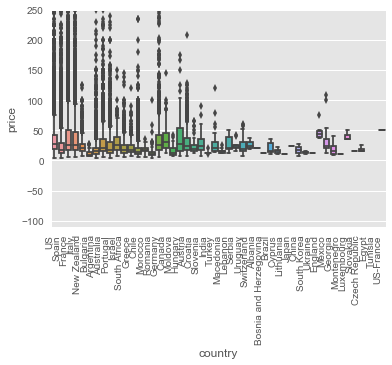

In [47]:
sns.boxplot(x="country", y="price", data=df, width=0.8)
ax = plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
ax.set_ybound(lower=None, upper=250)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

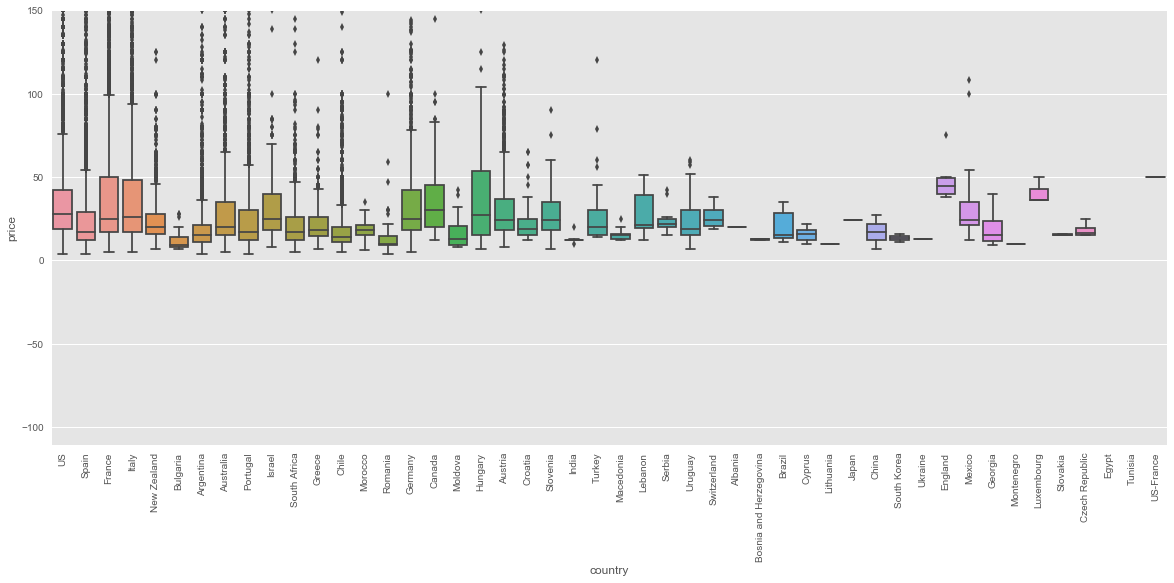

In [52]:
fig, ax = plt.subplots(figsize = (20, 8))
plot = sns.boxplot(x="country", y="price", data=df, width=0.8, ax = ax)
ax.set_ybound(lower=None, upper=150)
plt.xticks(rotation=90)

In [53]:
df.describe()

,points,price
count,97818.000000,89105.000000
mean,87.956848,33.659514
std,3.217842,37.668256
min,80.000000,4.000000
25%,86.000000,16.000000
50%,88.000000,25.000000
75%,90.000000,40.000000
max,100.000000,2300.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47]),
 <a list of 48 Text xticklabel objects>)

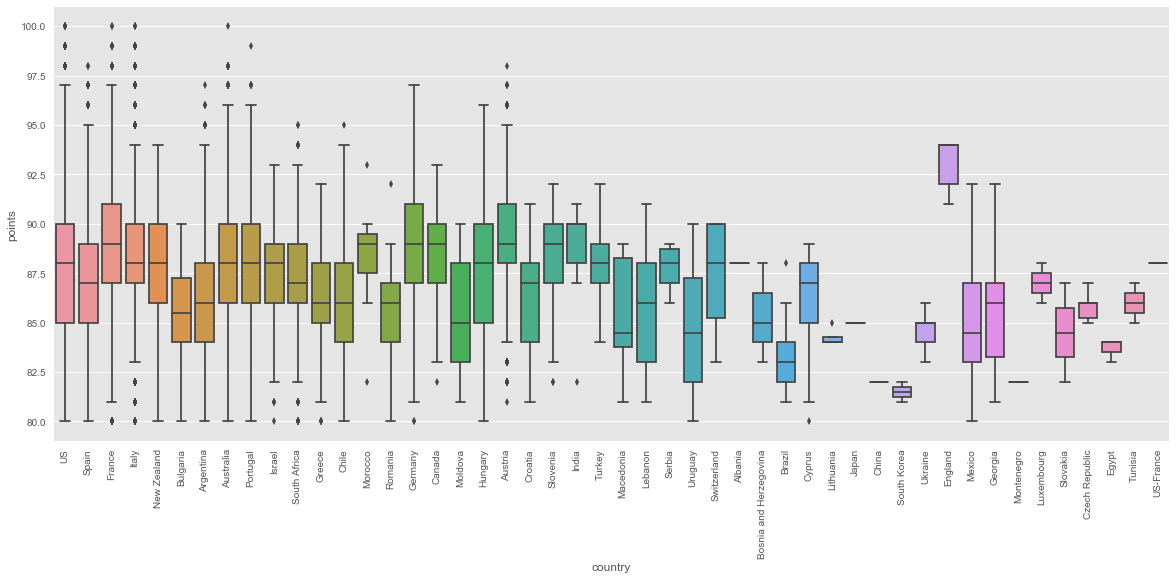

In [56]:
fig, ax = plt.subplots(figsize = (20, 8))
plot = sns.boxplot(x="country", y="points", data=df, width=0.8, ax = ax)
plt.xticks(rotation=90)

In [61]:
avg_price = pd.pivot_table(df, values=("price", "points"), index="country", aggfunc='mean')
avg_price.sort_values(by="price", ascending=False)

,points,price
country,,
US-France,88.000000,50.000000
England,92.888889,47.500000
Hungary,87.690647,47.166667
France,88.918558,44.910644
Germany,88.848267,42.537787
Luxembourg,87.000000,40.666667
Italy,88.390853,37.896066
Canada,88.724832,36.040541
US,87.909205,34.122366
